<a href="https://colab.research.google.com/github/Edersao/Atmosf-ricos/blob/main/Precipitaciones_anuales_mapas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install netCDF4
!pip install basemap
!pip install datetime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 62.3 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.1/247.1 kB 12.9 MB/s eta 0:00:00


# **NUEVO INTENTO CON X-ARRAYS**

In [15]:
from datetime import datetime, timedelta
import os
from netCDF4 import Dataset
import numpy as np
import glob
import csv
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid

#df_ixil = pd.DataFrame(columns=['Fecha', 'Precipitacion_promedio'])
os.chdir("/content/drive/MyDrive/atmos/datos/Ixil/Ixil/Precipitacion")
archivos = sorted(glob.glob('g4.timeAvgMap.TRMM_3B42_Daily_7_precipitation*.nc'))

key_error = []
os_error = []
runtime_error = []

idx = pd.DatetimeIndex([""])
df_ixil=pd.DataFrame(columns=['Precipitacion_promedio'],index=idx)

In [17]:
ds = xr.open_dataset('/content/drive/MyDrive/atmos/datos/Ixil/Ixil/Precipitacion/g4.timeAvgMap.TRMM_3B42_Daily_7_precipitation.20120101-20120131.90W_18N_86W_22N.nc')
lat = ds.lat
lon = ds.lon
arr2 = [[0 for col in range(15)] for row in range(15)]
ixil_base = xr.DataArray(arr2, coords=[lat,lon], dims=["lat", "lon"])
df_ixil_2012 = ixil_base.to_pandas()
df_ixil_2013 = ixil_base.to_pandas()
df_ixil_2014 = ixil_base.to_pandas()
df_ixil_2015 = ixil_base.to_pandas()
df_ixil_2016 = ixil_base.to_pandas()
df_ixil_2017 = ixil_base.to_pandas()
df_ixil_2018 = ixil_base.to_pandas()
df_ixil_2019 = ixil_base.to_pandas()

In [18]:
ds = xr.open_dataset('/content/drive/MyDrive/atmos/datos/Ixil/Ixil/Precipitacion/g4.timeAvgMap.GPCPMON_3_2_satellite_precip.20200201-20200229.90W_18N_86W_22N.nc')
lat = ds.lat
lon = ds.lon
arr3 = [[0 for col in range(8)] for row in range(8)]
ixil_base2 = xr.DataArray(arr3, coords=[lat,lon], dims=["lat", "lon"])
df_ixil_2020 = ixil_base2.to_pandas()
df_ixil_2021 = ixil_base2.to_pandas()
df_ixil_2022 = ixil_base2.to_pandas()
df_ixil_2023 = ixil_base2.to_pandas()

In [19]:
for arch in archivos:
    try:
        print(arch)
        data = Dataset(arch)
        ds = xr.open_dataset(arch)
        avg_prec = ds.TRMM_3B42_Daily_7_precipitation
        lat1 = ds.lat
        lon1 = ds.lon
        ixil1 = xr.DataArray(avg_prec, coords=[lat1,lon1], dims=["lat", "lon"])
        df = ixil1.to_pandas()
        fecha = datetime.strptime(ds.start_time, '%Y-%m-%dT%H:%M:%SZ')
        date_formatted = datetime.strftime(fecha,'%Y')
        if date_formatted == '2012':
          df_ixil_2012 = df_ixil_2012 + df
        if date_formatted == '2013':
          df_ixil_2013 = df_ixil_2013 + df
        if date_formatted == '2014':
          df_ixil_2014 = df_ixil_2014 + df
        if date_formatted == '2015':
          df_ixil_2015 = df_ixil_2015 + df
        if date_formatted == '2016':
          df_ixil_2016 = df_ixil_2016 + df
        if date_formatted == '2017':
          df_ixil_2017 = df_ixil_2017 + df
        if date_formatted == '2018':
          df_ixil_2018 = df_ixil_2018 + df
        if date_formatted == '2019':
          df_ixil_2019 = df_ixil_2019 + df
        #avg_prec = data.variables['TRMM_3B42_Daily_7_precipitation']
        #df1=pd.DataFrame(({"Precipitacion_promedio": avg_prec, "lat": lat, "lon": lon}),index=pd.DatetimeIndex([date_formatted]))
        #df_ixil = df_ixil.append(df)
    except KeyError:
        key_error.append(arch)
    except OSError:
        os_error.append(arch)
    except RuntimeError:
        runtime_error.append(arch)

g4.timeAvgMap.TRMM_3B42_Daily_7_precipitation.20120101-20120131.90W_18N_86W_22N.nc
g4.timeAvgMap.TRMM_3B42_Daily_7_precipitation.20120201-20120229.90W_18N_86W_22N.nc
g4.timeAvgMap.TRMM_3B42_Daily_7_precipitation.20120301-20120331.90W_18N_86W_22N.nc
g4.timeAvgMap.TRMM_3B42_Daily_7_precipitation.20120401-20120430.90W_18N_86W_22N.nc
g4.timeAvgMap.TRMM_3B42_Daily_7_precipitation.20120501-20120531.90W_18N_86W_22N.nc
g4.timeAvgMap.TRMM_3B42_Daily_7_precipitation.20120601-20120630.90W_18N_86W_22N.nc
g4.timeAvgMap.TRMM_3B42_Daily_7_precipitation.20120701-20120731.90W_18N_86W_22N.nc
g4.timeAvgMap.TRMM_3B42_Daily_7_precipitation.20120801-20120831.90W_18N_86W_22N.nc
g4.timeAvgMap.TRMM_3B42_Daily_7_precipitation.20120901-20120930.90W_18N_86W_22N.nc
g4.timeAvgMap.TRMM_3B42_Daily_7_precipitation.20121001-20121031.90W_18N_86W_22N.nc
g4.timeAvgMap.TRMM_3B42_Daily_7_precipitation.20121101-20121130.90W_18N_86W_22N.nc
g4.timeAvgMap.TRMM_3B42_Daily_7_precipitation.20121201-20121231.90W_18N_86W_22N.nc
g4.t

In [26]:
os.chdir("/content/drive/MyDrive/atmos/datos/Ixil/Ixil/Precipitacion")
archivos = sorted(glob.glob('g4.timeAvgMap.GPCPMON_3_2_satellite_precip*.nc'))

key_error = []
os_error = []
runtime_error = []

#idx = pd.DatetimeIndex([""])
#df_ixil=pd.DataFrame(columns=['Precipitacion_promedio'],index=idx)

In [27]:
for arch in archivos:
    try:
        print(arch)
        data = Dataset(arch)
        ds = xr.open_dataset(arch)
        avg_prec = ds.GPCPMON_3_2_satellite_precip
        lat2 = ds.lat
        lon2 = ds.lon
        ixil1 = xr.DataArray(avg_prec, coords=[lat2,lon2], dims=["lat", "lon"])
        df = ixil1.to_pandas()
        fecha = datetime.strptime(ds.start_time, '%Y-%m-%dT%H:%M:%SZ')
        date_formatted = datetime.strftime(fecha,'%Y')
        if date_formatted == '2020':
          df_ixil_2020 = df_ixil_2020 + df
        if date_formatted == '2021':
          df_ixil_2021 = df_ixil_2021 + df
        if date_formatted == '2022':
          df_ixil_2022 = df_ixil_2022 + df
        if date_formatted == '2023':
          df_ixil_2023 = df_ixil_2023 + df
        #avg_prec = data.variables['TRMM_3B42_Daily_7_precipitation']
        #df1=pd.DataFrame(({"Precipitacion_promedio": avg_prec, "lat": lat, "lon": lon}),index=pd.DatetimeIndex([date_formatted]))
        #df_ixil = df_ixil.append(df)
    except KeyError:
        key_error.append(arch)
    except OSError:
        os_error.append(arch)
    except RuntimeError:
        runtime_error.append(arch)

g4.timeAvgMap.GPCPMON_3_2_satellite_precip.20200101-20200131.90W_18N_86W_22N.nc
g4.timeAvgMap.GPCPMON_3_2_satellite_precip.20200201-20200229.90W_18N_86W_22N.nc
g4.timeAvgMap.GPCPMON_3_2_satellite_precip.20200301-20200331.90W_18N_86W_22N.nc
g4.timeAvgMap.GPCPMON_3_2_satellite_precip.20200401-20200430.90W_18N_86W_22N.nc
g4.timeAvgMap.GPCPMON_3_2_satellite_precip.20200501-20200531.90W_18N_86W_22N.nc
g4.timeAvgMap.GPCPMON_3_2_satellite_precip.20200601-20200630.90W_18N_86W_22N.nc
g4.timeAvgMap.GPCPMON_3_2_satellite_precip.20200701-20200731.90W_18N_86W_22N.nc
g4.timeAvgMap.GPCPMON_3_2_satellite_precip.20200801-20200831.90W_18N_86W_22N.nc
g4.timeAvgMap.GPCPMON_3_2_satellite_precip.20200901-20200930.90W_18N_86W_22N.nc
g4.timeAvgMap.GPCPMON_3_2_satellite_precip.20201001-20201031.90W_18N_86W_22N.nc
g4.timeAvgMap.GPCPMON_3_2_satellite_precip.20201101-20201130.90W_18N_86W_22N.nc
g4.timeAvgMap.GPCPMON_3_2_satellite_precip.20201201-20201231.90W_18N_86W_22N.nc
g4.timeAvgMap.GPCPMON_3_2_satellite_prec

In [30]:
lista_a = [df_ixil_2012,df_ixil_2013,df_ixil_2014,df_ixil_2015,df_ixil_2016,df_ixil_2017,df_ixil_2018,df_ixil_2019,df_ixil_2020,df_ixil_2021,df_ixil_2022,df_ixil_2023]

lon,-90.25,-89.75,-89.25,-88.75,-88.25,-87.75,-87.25,-86.75
lat,,,,,,,,
18.25,0.798092,0.414502,0.706295,1.598173,3.630920,4.195384,3.822060,2.905267
18.75,0.484978,0.589566,0.784692,2.253635,4.205464,3.991053,2.267219,2.903380
19.25,0.557325,1.207084,1.232801,3.255046,2.441556,3.158102,3.006892,3.777078
19.75,0.764841,0.784534,1.142510,3.123758,2.037592,2.609452,3.623170,2.422751
20.25,1.152790,1.703846,0.709364,2.053936,4.175623,1.987490,1.945629,2.411248
20.75,1.775559,2.093059,1.296998,2.203893,3.384892,4.087684,2.497486,2.440453
21.25,1.912113,2.443571,2.453470,2.095421,1.972575,5.547010,4.854360,3.190801
21.75,3.139682,2.016237,1.822247,1.156214,1.065999,1.714384,3.344706,3.066082


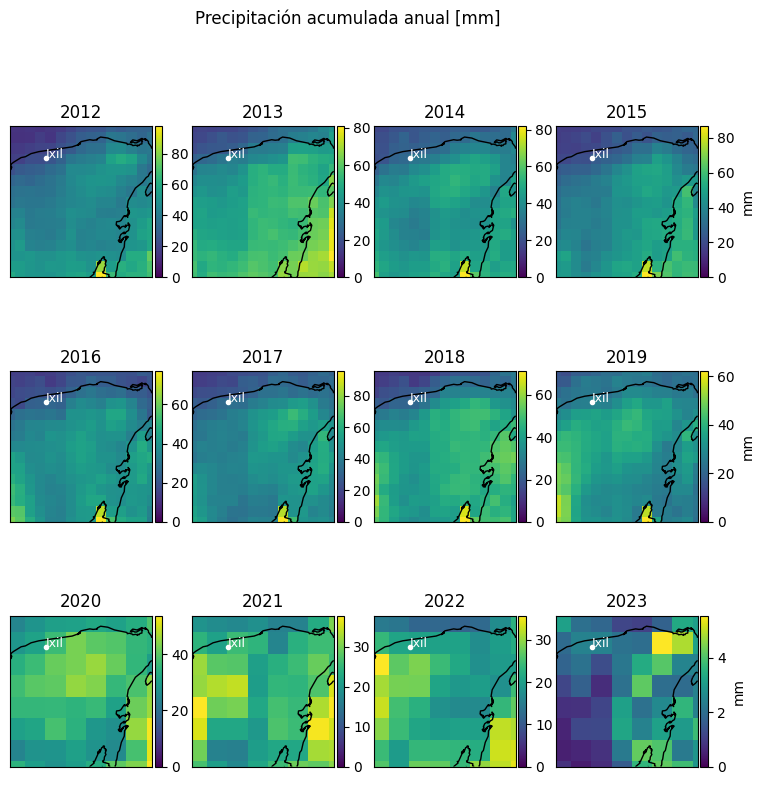

In [65]:
unidad = "mm"
ix_lat = 21.1522
ix_lon = -89.4822
num = 2012
ii = 0

fig, axes = plt.subplots(nrows=3, ncols=4,figsize=(9,9))
for ax in axes.flat:
    num_s = str(num)
    m = Basemap(projection='merc',llcrnrlat=18.375,urcrnrlat=21.875,\
            llcrnrlon=-90.375,urcrnrlon=-86.875,lat_ts=10,resolution = 'i', ax=ax)
    m.drawcoastlines()
    #my_cmap=plt.cm.get_cmap('gist_rainbow')
    #my_cmap.set_under('w')
    x0 , y0 = m(ix_lon, ix_lat)
    m.plot(x0, y0, 'ow', markersize=3)
    if num < 2020:
      x , y = m(lon1, lat1)
    else:
      x , y = m(lon2, lat2)
    mb = m.pcolormesh(x,y, lista_a[ii],vmin=0)
    cb = m.colorbar(mb)
    if ii in [3,7,11]:
      #cb = m.colorbar(mb)
      cb.set_label(unidad)


    ax.text(x0, y0, 'Ixil', fontsize=9, color='w')
    ax.set_title(num_s)
    num = num + 1
    ii = ii + 1

plt.suptitle('Precipitación acumulada anual [mm]')
plt.show()
